# 팬시 인덱싱

In [1]:
import numpy as np
rand=np.random.RandomState(42)
x=rand.randint(100,size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
#세 개의 다른 요소에 접근
[x[3],x[7],x[2]]

[71, 86, 14]

In [3]:
#인덱스의 단일 리스트나 배열을 전달해 같은 결과를 얻음
ind=[3,7,2]
x[ind]

array([71, 86, 14])

In [4]:
ind=np.array([[3,7],
             [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [5]:
X=np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
row=np.array([0,1,2])
col=np.array([2,1,3])
X[row,col] #첫 번째 인덱스는 행을 두 번재 인덱스는 열을 의미

array([ 2,  5, 11])

In [7]:
X[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [8]:
row[:,np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

# 결합 인덱싱

In [9]:
print(X)
X[2,[2,0,1]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([10,  8,  9])

In [10]:
X[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [11]:
mask=np.array([1,0,1,0],dtype=bool)
X[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

# 예제: 임의의 점 선택하기

In [12]:
#행렬에서 행의 부분집합
mean=[0,0]
cov=[[1,2],
    [2,5]]
X=rand.multivariate_normal(mean,cov,100)
X.shape

(100, 2)

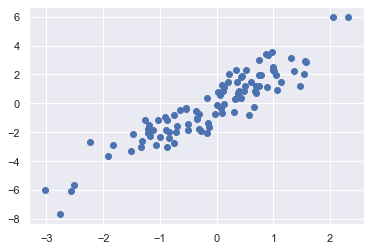

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0],X[:,1]);

In [14]:
#반복 없이 임의로 인덱스를 20개 선택 
indices=np.random.choice(X.shape[0],20,replace=False)
indices

array([28, 51, 59, 65, 49, 99, 45, 58, 88, 21, 67, 56, 41, 32, 11, 26, 98,
       87,  7, 78])

In [15]:
selection=X[indices] #팬시 인덱싱 사용
selection.shape

(20, 2)

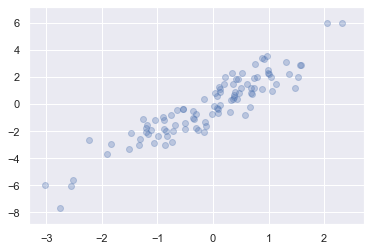

In [16]:
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.scatter(selection[:,0],selection[:,1],
           facecolor='none',s=200);

# 팬시 인덱싱으로 값 변경하기

In [17]:
x=np.arange(10)
i=np.array([2,1,8,4])
x[i]=99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [18]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [19]:
x=np.zeros(10)
x[[0,0]]=[4,6]
print(x)  #x[0]에 4가 먼저 할당 되고 다음 6이 할당 되어 결과적으로는 6을 갖는다

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
i=[2,3,3,4,4,4]
x[i]+=1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [21]:
x=np.zeros(10)
np.add.at(x,i,1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


# 예제: 데이터 구간화

In [22]:
np.random.seed(42)
x=np.random.randn(100)
#직접 히스토그램 계산하기
bins=np.linspace(-5,5,20)
counts=np.zeros_like(bins)

#각 x에 대한 적절한 구간 찾기
i=np.searchsorted(bins,x)

#각 구간에 1 더하기
np.add.at(counts,i,1)

C:\Users\gksgk\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  """Entry point for launching an IPython kernel.


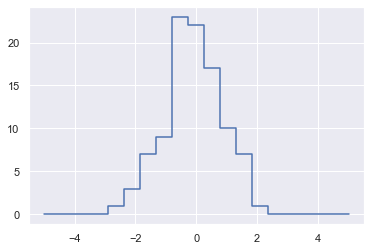

In [23]:
plt.plot(bins,counts,linestyle='steps');

In [24]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x,bins)
print("Custome routine:")
%timeit np.add.at(counts,np.searchsorted(bins,x),1)

NumPy routine:
59.3 µs ± 2.62 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custome routine:
31.1 µs ± 344 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# 배열 정렬

In [25]:
#선택 정렬
def selection_sort(x):
    for i in range(len(x)):
        swap = i+np.argmin(x[i:])
        (x[i],x[swap]) =(x[swap],x[i])
    return x
x=np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [26]:
#보고 정렬
def bogosort(x):
    while np.any(x[:-1]>x[1:]):
        np.random.shuffle(x)
    return x
x=np.array([2,1,4,3,5])
bogosort(x)

array([1, 2, 3, 4, 5])

# NumPy의 빠른 정렬

In [27]:
x=np.array([2,1,3,4,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [28]:
x.sort()
print(x)

[1 2 3 4 5]


In [29]:
#정렬된 요소의 인덱스를 반환
x=np.array([2,1,4,3,5])
i=np.argsort(x)
print(i)

[1 0 3 2 4]


In [30]:
x[i]

array([1, 2, 3, 4, 5])

In [31]:
#행이나 열 기준으로 정렬
rand=np.random.RandomState(42)
X=rand.randint(0,10,(4,6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [32]:
#X의 각 열을 정렬
np.sort(X,axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [33]:
#X의 각 행을 정렬
np.sort(X,axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

# 부분 정렬: 파티션 나누기

In [34]:
#왼쪽에는 K개의 가장 작은 값이 있고 오른쪽에는 나머지 값이 임의의 순서로 채워짐
x=np.array([7,2,3,1,6,5,4])
np.partition(x,3)

array([2, 1, 3, 4, 6, 5, 7])

In [35]:
np.partition(X,2,axis=1) #다차원 배열의 임의의 축을 따라 파티셔닝
#np.argpartition 파티션의 인덱스를 계산하는 함수

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

# 예제: k 최근접 이웃 알고리즘

In [36]:
X = rand.rand(10,2)

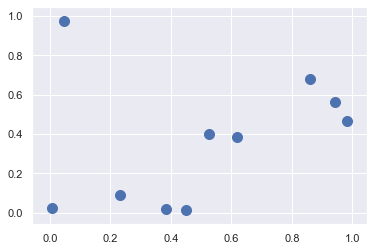

In [37]:
plt.scatter(X[:,0],X[:,1],s=100)

In [38]:
dist_sq=np.sum((X[:,np.newaxis,:]-X[np.newaxis,:,:])**2,axis=-1)

In [39]:
differences=X[:,np.newaxis,:]-X[np.newaxis,:,:]
differences.shape

(10, 10, 2)

In [40]:
sq_differences=differences**2
sq_differences.shape

(10, 10, 2)

In [41]:
dist_sq=sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [42]:
#각 점과 그 점 자신 사이의 거리 집ㄹ합 확인
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
nearest=np.argsort(dist_sq,axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [44]:
K=2
nearest_partition=np.argpartition(dist_sq,K+1,axis=1)

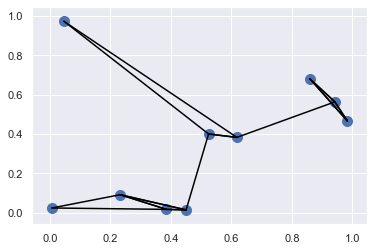

In [45]:
plt.scatter(X[:,0],X[:,1],s=100)
#각 점을 두 개의 가장 가까운 이웃과 선으로 이음
k=2
for i in range(X.shape[0]):
    for j in nearest_partition[i,:k+1]:
        #x[i]부터 x[j]까지 선으로 이음
        #zip  매직 함수를 이용함
        plt.plot(*zip(X[j],X[i]),color='black')